# 4.10 IC Coding Etiquette & Excel Reporting

## The script below contains the following:

1. Import libraries
2. Import dataframes and check the dimensions
3. Create regional segmentation of the data
4. Create exclusion flag for low activity customer
5. Create profiling variable
6. Create an appropriate visualization to show the distribution of profiles
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
8. Compare your customer profiles with regions and departments
9. Create suitable charts to illustrate the results
10. Export the final dataset

## 1. Import libraries

In [133]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Import dataframe and check the dimensions

In [134]:
# Create path variable to import dataframe

path = r'C:\Users\babum\Desktop\CF_Data Analytics\Data Immersion\Achievement 4\02-2023 Instacart Basket Analysis'

In [135]:
# Import dataframe

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))

In [136]:
df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'departments_wrangled.csv'),index_col = [0])

In [137]:
#Check the dimensions

ords_prods_all.shape

(32399732, 31)

In [138]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,median_days_prior_order,order_frequency_flag,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [139]:
ords_prods_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_prior_order', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'num_of_dependants',
       'family_status', 'income', '_merge'],
      dtype='object')

## 3. Create regional segmentation of the data

In [140]:
ords_prods_all['state'].value_counts(dropna = False)

Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636070
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
Mississi

In [141]:
# Creating a list

NE_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
MW_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
S_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
W_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [142]:
# Creating the region column

ords_prods_all.loc[ords_prods_all['state'].isin(NE_region), 'region'] = 'Northeast'

In [143]:
ords_prods_all.loc[ords_prods_all['state'].isin(MW_region), 'region'] = 'Midwest'

In [144]:
ords_prods_all.loc[ords_prods_all['state'].isin(S_region), 'region'] = 'South'

In [145]:
ords_prods_all.loc[ords_prods_all['state'].isin(W_region), 'region'] = 'West'

In [146]:
#Check the output

ords_prods_all['region'].value_counts(dropna = False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: region, dtype: int64

## Determine whether there’s a difference in spending habits between the different U.S. regions.

In [147]:
#Creating a crosstab for columns "region" and "spending_flag"

crosstab_spending_region = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [148]:
crosstab_spending_region

spending_flag,High spender,Low spender
region,,
Midwest,154715,7441350
Northeast,107381,5614511
South,207902,10582194
West,159120,8132559


In [149]:
len(ords_prods_all['region'])

32399732

## 4. Create exclusion flag for low activity customer

In [150]:
# Creating "exclusion flag"

ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'exclusion_flag'] = 'High-activity customers'

In [151]:
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customers'

In [152]:
# Check the output

ords_prods_all['exclusion_flag'].value_counts(dropna = False)

High-activity customers    30959687
Low-activity customers      1440045
Name: exclusion_flag, dtype: int64

In [153]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,High-activity customers
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,High-activity customers
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,High-activity customers
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Low-activity customers
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Low-activity customers


In [154]:
# Subsetting the data based on the "exclusion_flag"

df_high_cust = ords_prods_all.loc[ords_prods_all['exclusion_flag'] == 'High-activity customers']

In [155]:
df_high_cust['exclusion_flag'].value_counts(dropna = False)

High-activity customers    30959687
Name: exclusion_flag, dtype: int64

In [156]:
df_low = ords_prods_all.loc[ords_prods_all['exclusion_flag'] == 'Low-activity customers']

In [157]:
df_low['exclusion_flag'].value_counts(dropna = False)

Low-activity customers    1440045
Name: exclusion_flag, dtype: int64

In [158]:
# Export the sample document

df_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customer.pkl'))

## Subsetting the dataframe due to memory usage issue

In [159]:
# Create a list holding Ture/False values to the test np.random.rand() <=0.7

np.random.seed(4)
dev = np.random.rand(len(df_high_cust)) <= 0.7

In [160]:
# Store 70% of the sample in the dataframe

df = df_high_cust[dev]

In [161]:
# Store 30% of the sample in the dataframe 

df_high = df_high_cust[~dev]

In [162]:
df.shape

(21672693, 33)

In [163]:
df_high.shape

(9286994, 33)

In [164]:
# Check the output

len(df) + len(df_high)

30959687

In [165]:
# Export the dataframe

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Big_sample_high_valued_customers.pkl'))

## 5. Create profiling variable

In [166]:
df_high.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_prior_order', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'num_of_dependants',
       'family_status', 'income', '_merge', 'region', 'exclusion_flag'],
      dtype='object')

In [167]:
df_high['family_status'].value_counts(dropna = False)

married                             6520622
single                              1528394
divorced/widowed                     793792
living with parents and siblings     444186
Name: family_status, dtype: int64

In [168]:
df_high['income'].describe()

count    9.286994e+06
mean     9.967540e+04
std      4.311703e+04
min      2.590300e+04
25%      6.732600e+04
50%      9.677500e+04
75%      1.281060e+05
max      5.939010e+05
Name: income, dtype: float64

In [169]:
# Creating customer profile based on age

df_high.loc[df_high['age'] < 40, 'age_flag'] = 'Young'
df_high.loc[(df_high['age'] >= 40) & (df_high['age'] < 65), 'age_flag'] = 'Middle-aged'
df_high.loc[df_high['age'] >= 65, 'age_flag'] = 'Senior citizen'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\1979672338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['age'] < 40, 'age_flag'] = 'Young'


In [170]:
df_high['age_flag'].value_counts(dropna = False)

Middle-aged       3629512
Young             3199533
Senior citizen    2457949
Name: age_flag, dtype: int64

In [171]:
# Creating customer profile based on income

df_high.loc[df_high['income'] < 67286, 'income_flag'] = 'Low income'
df_high.loc[(df_high['income'] >= 67286) & (df_high['income'] < 128081), 'income_flag'] = 'Average income'
df_high.loc[df_high['income'] >= 128081, 'income_flag'] = 'High income'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\1679856926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['income'] < 67286, 'income_flag'] = 'Low income'


In [172]:
df_high['income_flag'].value_counts(dropna = False)

Average income    4644210
High income       2323090
Low income        2319694
Name: income_flag, dtype: int64

In [173]:
df_high.shape

(9286994, 35)

### Profile based on department_id

In [174]:
# Create profile for pet owners

df_high.loc[df_high['department_id'] == 8, 'profile_pets'] = 'Pet owners'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\1189286610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['department_id'] == 8, 'profile_pets'] = 'Pet owners'


In [175]:
# Create profile for non pet owners

df_high['profile_pets'] = df_high['profile_pets'].fillna('No pets')

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\3567968312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['profile_pets'] = df_high['profile_pets'].fillna('No pets')


In [176]:
# Create profile for meat eaters

df_high.loc[df_high['department_id'] == 12, 'profile_meat_eaters'] = 'Meat eaters'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\3768652765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['department_id'] == 12, 'profile_meat_eaters'] = 'Meat eaters'


In [177]:
# Create profile for non meat eaters

df_high['profile_meat_eaters'] = df_high['profile_meat_eaters'].fillna('Non meat eaters')

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\288939344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['profile_meat_eaters'] = df_high['profile_meat_eaters'].fillna('Non meat eaters')


In [178]:
# Create profile for alcohol consumers

df_high.loc[df_high['department_id'] == 5, 'profile_alcohol_consumers'] = 'Alcohol consumers'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\2894179110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['department_id'] == 5, 'profile_alcohol_consumers'] = 'Alcohol consumers'


In [179]:
# Create profile for non alcoholic

df_high['profile_alcohol_consumers'] = df_high['profile_alcohol_consumers'].fillna('Non-alcoholic')

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\5367479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['profile_alcohol_consumers'] = df_high['profile_alcohol_consumers'].fillna('Non-alcoholic')


In [180]:
# Create profile for cusotmers with babies

df_high.loc[df_high['department_id'] == 18, 'profile_babies'] = 'Customers with babies'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\3728080800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['department_id'] == 18, 'profile_babies'] = 'Customers with babies'


In [181]:
# Create profile for cusotmer with no babies

df_high['profile_babies'] = df_high['profile_babies'].fillna('Customers with no babies')

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\4286340095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['profile_babies'] = df_high['profile_babies'].fillna('Customers with no babies')


### Profile based on order_hour_of day

In [182]:
# Create customer profile based on their shopping time

df_high.loc[df_high['order_hour_of_day'].isin([22,23,0,1,2,3,4,5,6,7,8]), 'profile_shopping_time'] = 'Odd hour shopper'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\3221576873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['order_hour_of_day'].isin([22,23,0,1,2,3,4,5,6,7,8]), 'profile_shopping_time'] = 'Odd hour shopper'


In [183]:
df_high.loc[df_high['order_hour_of_day'].isin([9,10,11,12,13,14,15,16,17]), 'profile_shopping_time'] = 'Morning peak hour shopper'

In [184]:
df_high.loc[df_high['order_hour_of_day'].isin([18,19,20,21]), 'profile_shopping_time'] = 'Evening shopper'

### Profile based on age, family status and number of dependants

In [185]:
# Create profile for young couple

df_high.loc[((df_high['age_flag'] == 'Young') & (df_high['family_status'] == 'married')) & (df_high['num_of_dependants'] < 2), 'profile_fam'] = 'Young couple'

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\658215243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[((df_high['age_flag'] == 'Young') & (df_high['family_status'] == 'married')) & (df_high['num_of_dependants'] < 2), 'profile_fam'] = 'Young couple'


In [186]:
# Creating single adult with no dependants

df_high.loc[(df_high['family_status'] == 'single') & (df_high['num_of_dependants'] == 0), 'profile_fam'] = 'Single adult'

In [187]:
# Creating single adult with dependants

df_high.loc[(df_high['family_status'] == 'single') & (df_high['num_of_dependants'] > 0), 'profile_fam'] = 'Single adult with dependants'

In [188]:
# Creating married with dependants

df_high.loc[(df_high['family_status'] == 'married') & (df_high['num_of_dependants'] >= 2), 'profile_fam'] = 'Married with dependants'

In [189]:
# Creating divorced/widowed with no dependants

df_high.loc[(df_high['family_status'] == 'divorced/widowed') & (df_high['num_of_dependants'] == 0), 'profile_fam'] = 'Divorced/widowed with no dependants'

In [190]:
# Creating divorced/widowed with dependants

df_high.loc[(df_high['family_status'] == 'divorced/widowed') & (df_high['num_of_dependants'] > 0), 'profile_fam'] = 'Divorced/widowed with dependants'

In [191]:
# Creating living with parents and sibilings with no dependants

df_high.loc[(df_high['family_status'] == 'living with parents and siblings') & (df_high['num_of_dependants'] == 0), 'profile_fam'] = 'Parents/siblings with no dependants'

In [192]:
# Creating living with parents and sibilings with dependants

df_high.loc[(df_high['family_status'] == 'living with parents and siblings') & (df_high['num_of_dependants'] > 0), 'profile_fam'] = 'Parents/siblings with dependants'

In [193]:
# Creating married with no dependants

df_high['profile_fam'] = df_high['profile_fam'].fillna('Married with no dependants')

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\1027636318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['profile_fam'] = df_high['profile_fam'].fillna('Married with no dependants')


In [194]:
df_high['profile_shopping_time'].value_counts(dropna = False)

Morning peak hour shopper    6647519
Evening shopper              1331491
Odd hour shopper             1307984
Name: profile_shopping_time, dtype: int64

In [195]:
df_high['profile_fam'].value_counts(dropna = False)

Married with dependants                4359986
Single adult                           1528394
Married with no dependants             1516145
Divorced/widowed with no dependants     793792
Young couple                            644491
Parents/siblings with dependants        444186
Name: profile_fam, dtype: int64

In [196]:
df_high['profile_pets'].value_counts(dropna = False)

No pets       9258920
Pet owners      28074
Name: profile_pets, dtype: int64

In [197]:
df_high['profile_meat_eaters'].value_counts(dropna = False)

Non meat eaters    9083702
Meat eaters         203292
Name: profile_meat_eaters, dtype: int64

In [198]:
df_high['profile_alcohol_consumers'].value_counts(dropna = False)

Non-alcoholic        9243373
Alcohol consumers      43621
Name: profile_alcohol_consumers, dtype: int64

In [199]:
df_high.shape

(9286994, 41)

## 6. Create visualization to show the distribution of profiles

Text(0, 0.5, 'Frequency')

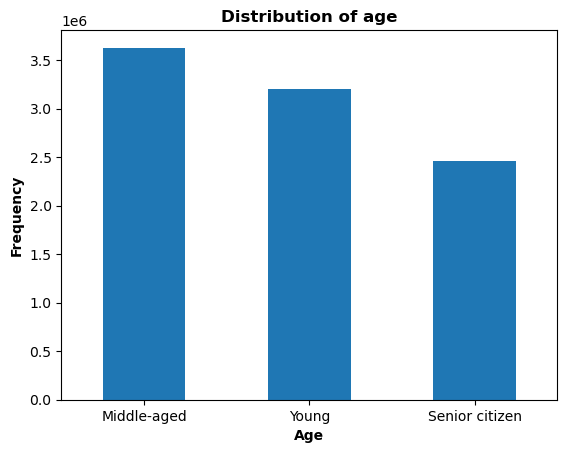

In [200]:
# Create bar chart for age_flag

bar_age = df_high['age_flag'].value_counts().plot.bar(rot = 0)
plt.title('Distribution of age', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

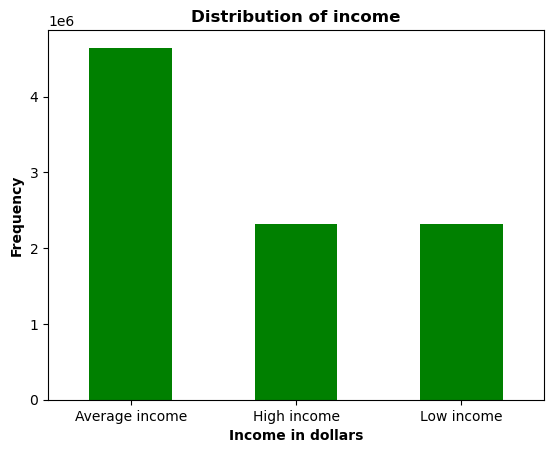

In [201]:
# Create bar chart for income_flag

bar_income = df_high['income_flag'].value_counts().plot.bar(color = 'green', rot = 0)
plt.title('Distribution of income', fontweight = 'bold')
plt.xlabel('Income in dollars', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')

([<matplotlib.axis.YTick at 0x27b0a66e040>,
 [Text(0, 5, 'Parents/sibilings\nwith dependants'),
  Text(0, 4, 'Young\ncouple'),
  Text(0, 3, 'Divorced/widowed\nno dependants'),
  Text(0, 2, 'Married\nno dependants'),
  Text(0, 1, 'Single adult'),
  Text(0, 0, 'Married\nwith dependants')])

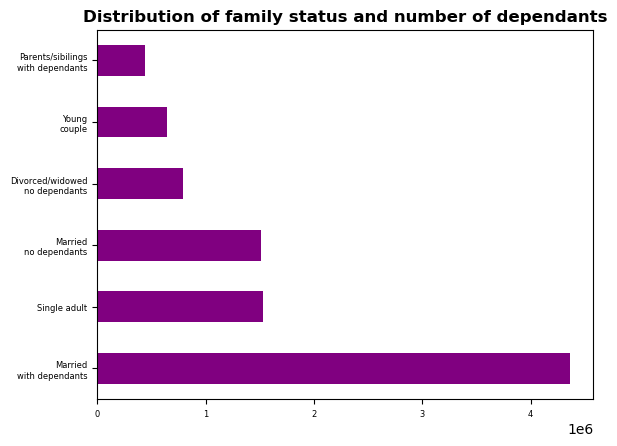

In [202]:
# Create bar chart for profile_fam

bar_fam = df_high['profile_fam'].value_counts().plot.barh(rot = 0, color = 'purple',fontsize = 6)
plt.title('Distribution of family status and number of dependants', fontweight = 'bold')
plt.yticks([5,4,3,2,1,0],['Parents/sibilings\nwith dependants','Young\ncouple','Divorced/widowed\nno dependants','Married\nno dependants','Single adult','Married\nwith dependants'])

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [203]:
# Creating a aggregation on customer profile for frequency and expenditure

df_high.groupby('profile_fam').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['max', 'min','mean']})

prices                 \
                                       max  min      mean   
profile_fam                                                 
Divorced/widowed with no dependants   25.0  1.0  7.807643   
Married with dependants               25.0  1.0  7.788688   
Married with no dependants            25.0  1.0  7.793801   
Parents/siblings with dependants      25.0  1.0  7.796732   
Single adult                          25.0  1.0  7.786563   
Young couple                          25.0  1.0  7.795667   

                                    days_since_prior_order                  
                                                       max  min       mean  
profile_fam                                                                 
Divorced/widowed with no dependants                   30.0  0.0  10.742188  
Married with dependants                               30.0  0.0  10.820312  
Married with no dependants                            30.0  0.0  10.828125  
Parents/siblings with dependants                      30.0  0.0  10.765625  
Single adult                                          30.0  0.0  10.804688  
Young couple                                          30.0  0.0  10.789062

## 8. Compare your customer profiles with regions and departments

#### Based on region

In [204]:
# Crosstab between age_flag and region

age_region = pd.crosstab(df_high['age_flag'], df_high['region'], dropna = False)

In [205]:
# Check the output

age_region

region,Midwest,Northeast,South,West
age_flag,,,,
Middle-aged,861944,631166,1198510,937892
Senior citizen,570681,444503,812226,630539
Young,745771,561895,1081851,810016


In [206]:
# Crosstab between income_flag and region

income_region = pd.crosstab(df_high['income_flag'], df_high['region'], dropna = False)

In [207]:
# Check the output

income_region

region,Midwest,Northeast,South,West
income_flag,,,,
Average income,1089848,816687,1549715,1187960
High income,552139,410960,765964,594027
Low income,536409,409917,776908,596460


In [208]:
# Crosstab between profile_fam and region

fam_region = pd.crosstab(df_high['profile_fam'], df_high['region'], dropna = False)

In [209]:
# Checkt the output

fam_region

region,Midwest,Northeast,South,West
profile_fam,,,,
Divorced/widowed with no dependants,185331,143144,263096,202221
Married with dependants,1010255,768320,1456336,1125075
Married with no dependants,362344,270418,494461,388922
Parents/siblings with dependants,105469,77118,151342,110257
Single adult,361849,262946,511655,391944
Young couple,153148,115618,215697,160028


#### Based on department

In [210]:
# Check department dataframe

df_dept

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [211]:
# Creating a data dictionary of department dataframe

dept_dict = dict(zip(df_dept.index, df_dept.department))

In [212]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [213]:
# Mapping the department_name to department_id in the  dataframe

df_high['department_name'] = df_high['department_id'].map(dept_dict)

C:\Users\babum\AppData\Local\Temp\ipykernel_3556\2081399367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['department_name'] = df_high['department_id'].map(dept_dict)


In [214]:
df_high.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,exclusion_flag,age_flag,income_flag,profile_pets,profile_meat_eaters,profile_alcohol_consumers,profile_babies,profile_shopping_time,profile_fam,department_name
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,High-activity customers,Senior citizen,Low income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Morning peak hour shopper,Married with no dependants,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,High-activity customers,Senior citizen,High income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Evening shopper,Married with dependants,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,High-activity customers,Middle-aged,Low income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Odd hour shopper,Married with dependants,snacks
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,High-activity customers,Senior citizen,High income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Evening shopper,Married with no dependants,snacks
12,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,38,4,13,...,High-activity customers,Young,Low income,No pets,Non meat eaters,Non-alcoholic,Customers with no babies,Morning peak hour shopper,Parents/siblings with dependants,snacks


In [215]:
# Crosstab between age_flag and department

age_dept = pd.crosstab(df_high['department_name'], df_high['age_flag'], dropna = False)

In [216]:
# Checkt the output

age_dept

age_flag,Middle-aged,Senior citizen,Young
department_name,,,
alcohol,16969,11016,15636
babies,49067,31728,42483
bakery,130805,88729,115512
beverages,304388,205379,262519
breakfast,78879,52375,69566
bulk,3859,2665,3454
canned goods,118327,80243,104649
dairy eggs,603370,410850,537967
deli,118183,79808,104212


In [217]:
# Crosstab between income_flag and department

income_dept = pd.crosstab(df_high['department_name'], df_high['income_flag'], dropna = False)

In [218]:
# Check the output

income_dept

income_flag,Average income,High income,Low income
department_name,,,
alcohol,20185,12339,11097
babies,66321,31857,25100
bakery,169020,86797,79229
beverages,363479,186104,222703
breakfast,95686,49064,56070
bulk,4999,2237,2742
canned goods,157307,79753,66159
dairy eggs,790689,393206,368292
deli,152428,75369,74406


In [219]:
# Crosstab between profile_fam and department

fam_dept = pd.crosstab(df_high['department_name'], df_high['profile_fam'], dropna = False)

In [220]:
# Check the output

fam_dept

profile_fam,Divorced/widowed with no dependants,Married with dependants,Married with no dependants,Parents/siblings with dependants,Single adult,Young couple
department_name,,,,,,
alcohol,3499,19963,7010,2559,7551,3039
babies,10318,58622,19408,5821,20666,8443
bakery,28541,156857,54919,15969,55518,23242
beverages,66650,363250,127132,35853,127209,52192
breakfast,17133,93977,32752,10025,32833,14100
bulk,786,4664,1746,490,1582,710
canned goods,25142,142790,49367,14644,50104,21172
dairy eggs,132807,725882,254176,75080,255299,108943
deli,26039,141681,48757,14373,50327,21026


In [221]:
# Crosstab between loyalty_flag and department

loyalty_dept = pd.crosstab(df_high['department_name'], df_high['loyalty_flag'], dropna = False)

In [222]:
loyalty_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alcohol,11690,8717,23214
babies,50097,14112,59069
bakery,113228,51645,170173
beverages,256578,118830,396878
breakfast,66028,31899,102893
bulk,4158,1245,4575
canned goods,87964,54029,161226
dairy eggs,549093,224747,778347
deli,97508,47712,156983


In [223]:
# Crosstab between spending_flag and region

spending_region = pd.crosstab(df_high['region'], df_high['spending_flag'], dropna = False)

In [224]:
spending_region

spending_flag,High spender,Low spender
region,,
Midwest,44553,2133843
Northeast,30632,1606932
South,59418,3033169
West,45365,2333082


In [225]:
# Crosstab between order_frequency_flag and department

ordr_freq_dept = pd.crosstab(df_high['department_name'], df_high['order_frequency_flag'], dropna = False)

In [226]:
ordr_freq_dept

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department_name,,,
alcohol,30336,4006,9279
babies,94892,7654,20732
bakery,230010,31077,73959
beverages,527651,72969,171666
breakfast,136521,19022,45277
bulk,7451,744,1783
canned goods,197036,32433,73750
dairy eggs,1086877,135263,330047
deli,203022,29460,69721


In [227]:
# Crosstab between price_range and department

price_dept = pd.crosstab(df_high['department_name'], df_high['price_range_loc'], dropna = False)

In [228]:
#Check the output

price_dept

price_range_loc,High-range product,Low-range product,Mid-range product
department_name,,,
alcohol,0,9976,33645
babies,0,36639,86639
bakery,0,82102,252944
beverages,0,245019,527267
breakfast,0,62663,138157
bulk,0,350,9628
canned goods,0,84269,218950
dairy eggs,0,411705,1140482
deli,0,90069,212134


In [229]:
# Crosstab between price_range and profile_fam

fam_price = pd.crosstab(df_high['profile_fam'], df_high['price_range_loc'], dropna = False)

In [230]:
# Crosstab between loyalty_flag and orders_day_of_week

loyalty_dow = pd.crosstab(df_high['loyalty_flag'], df_high['orders_day_of_week'], dropna = False)

In [231]:
# Crosstab between loyalty_flag and order_time

loyalty_hour = pd.crosstab(df_high['loyalty_flag'], df_high['profile_shopping_time'], dropna = False)

## 9. Create suitable charts to illustrate the results

Text(0, 0.5, 'Frequency')

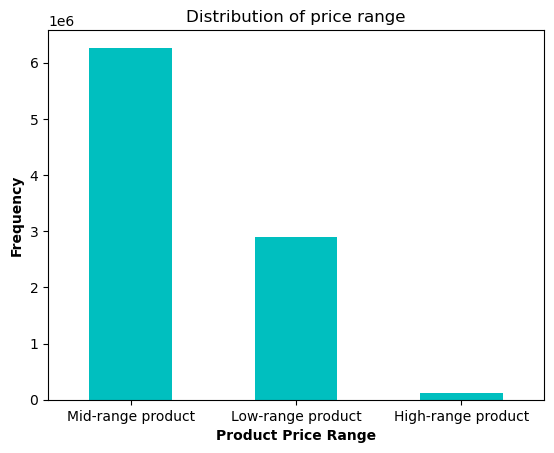

In [232]:
# Create bar chart for price_range

bar_price_range = df_high['price_range_loc'].value_counts().plot.bar(color = 'c', rot = 0)

plt.title('Distribution of price range')
plt.xlabel('Product Price Range', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

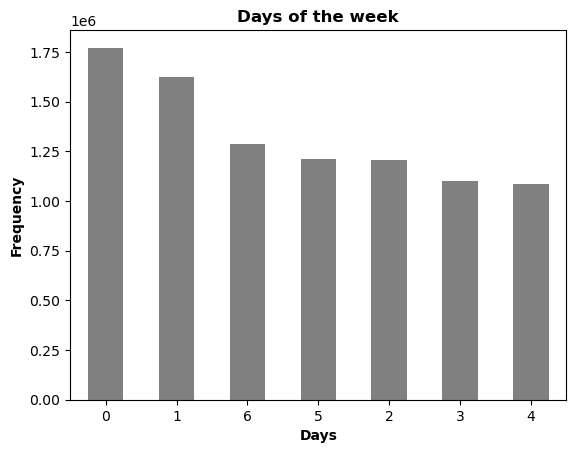

In [233]:
# Create bar chart for order_day_of_week

bar_dow = df_high['orders_day_of_week'].value_counts().plot.bar(color = 'grey', rot = 0)
plt.title('Days of the week', fontweight = 'bold')
plt.xlabel('Days', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

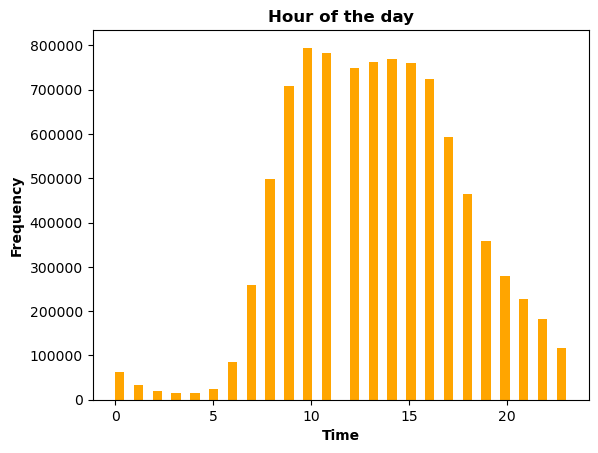

In [234]:
hist_hour = df_high['order_hour_of_day'].plot.hist(bins = 48, color = 'orange')
plt.title ('Hour of the day', fontweight = 'bold')
plt.xlabel ('Time', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

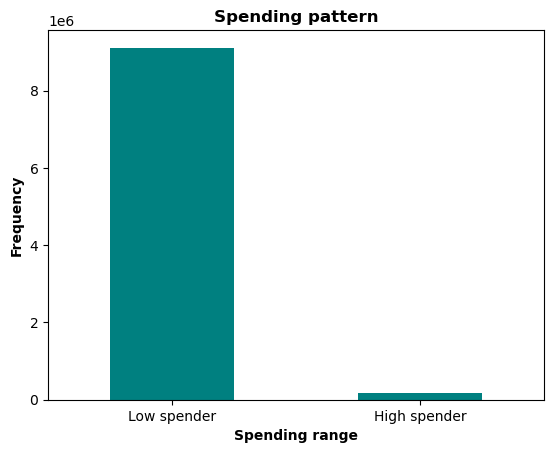

In [235]:
# Create bar chart for spending_flag

bar_spending = df_high['spending_flag'].value_counts().plot.bar(color = 'teal', rot = 0)
plt.title('Spending pattern', fontweight = 'bold')
plt.xlabel('Spending range', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

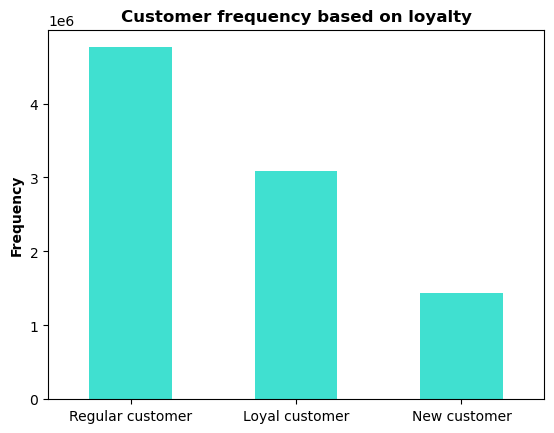

In [236]:
# Create bar chart for loyalty

bar_loyalty = df_high['loyalty_flag'].value_counts().plot.bar(color = 'turquoise', rot = 0)
plt.title('Customer frequency based on loyalty', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

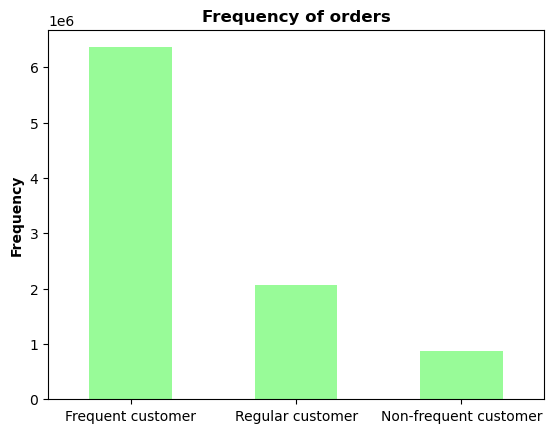

In [237]:
# Create bar chart for order_frequency

bar_order_freq = df_high['order_frequency_flag'].value_counts().plot.bar(color = 'palegreen', rot = 0)
plt.title('Frequency of orders', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0.5, 1.0, 'Distribution of alcohol-consumers ')

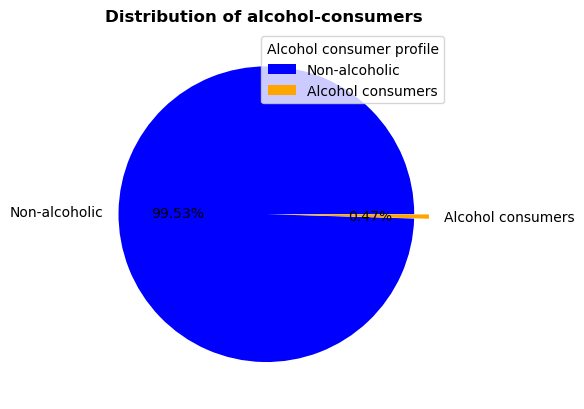

In [238]:
# Creating a pie chart for alcohol_consumers

pie_alcohol = df_high['profile_alcohol_consumers'].value_counts().plot.pie(labels = ['Non-alcoholic','Alcohol consumers'], colors = ['blue', 'orange'], autopct=('%.2f%%'), label = '', explode = [0,0.1])
pie_alcohol.legend(title = 'Alcohol consumer profile')
plt.title("Distribution of alcohol-consumers ", fontweight = 'bold')

Text(0.5, 1.0, 'Distribution of pet owners')

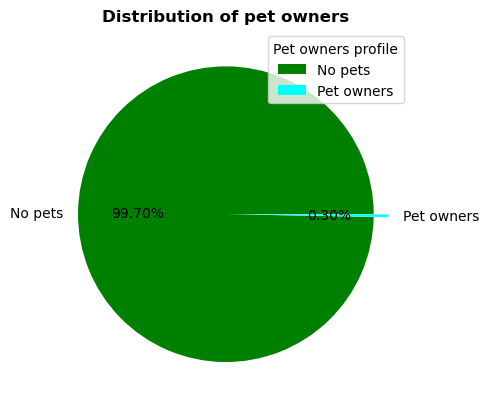

In [239]:
# Creating a pie chart for pet_owners

pie_pets = df_high['profile_pets'].value_counts().plot.pie(labels = ['No pets','Pet owners'], colors = ['green', 'cyan'], autopct=('%.2f%%'), label = '', explode = [0,0.1])
pie_pets.legend(title = 'Pet owners profile')
plt.title("Distribution of pet owners", fontweight = 'bold')

Text(0.5, 1.0, 'Distribution of meat eaters')

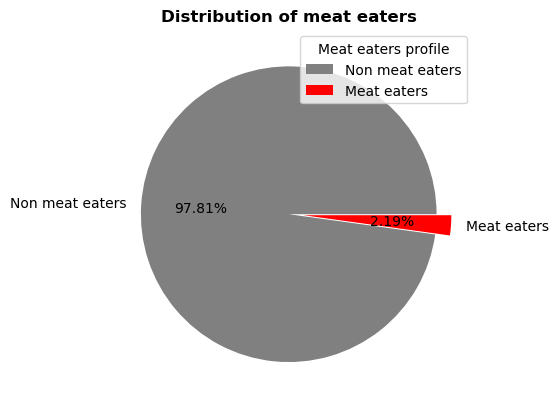

In [240]:
# Creating a pie chart for meat_eaters

pie_meat_eaters = df_high['profile_meat_eaters'].value_counts().plot.pie(labels = ['Non meat eaters','Meat eaters'], colors = ['grey', 'red'], autopct=('%.2f%%'), label = '', explode = [0,0.1])
pie_meat_eaters.legend(title = 'Meat eaters profile')
plt.title("Distribution of meat eaters", fontweight = 'bold')

Text(0.5, 1.0, 'Distribution of customers who buy baby products')

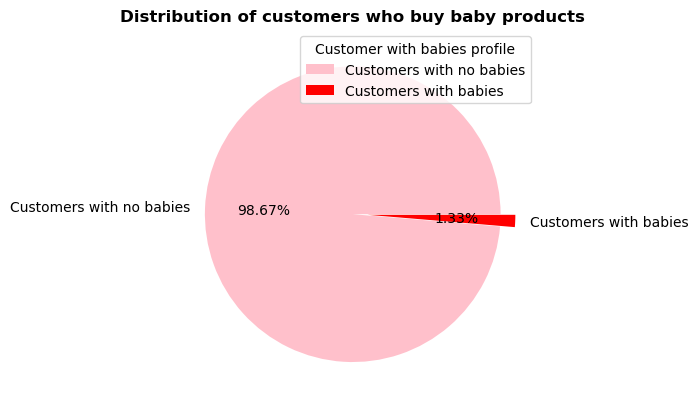

In [241]:
# Creating a pie chart for customers with babies

pie_babies = df_high['profile_babies'].value_counts().plot.pie(colors = ['pink', 'red'], autopct=('%.2f%%'), label = '', explode = [0,0.1])
pie_babies.legend(title = 'Customer with babies profile', loc = 'upper right')
plt.title("Distribution of customers who buy baby products", fontweight = 'bold')

Text(0.5, 0, 'Frequency')

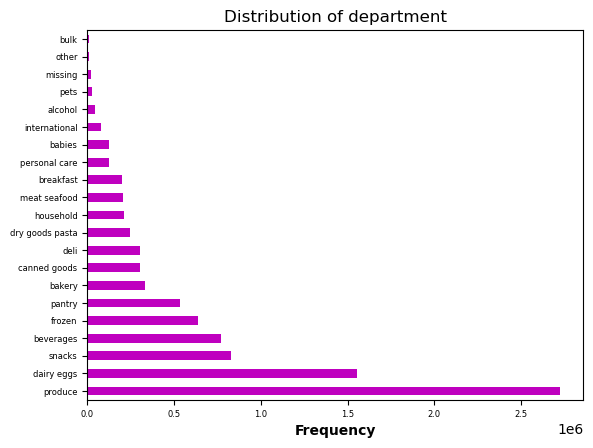

In [242]:
# Create bar chart for department frequency

bar_dept_freq = df_high['department_name'].value_counts().plot.barh(color = 'm', rot = 0, fontsize = 6)

plt.title('Distribution of department')
plt.xlabel ('Frequency', fontweight = 'bold')

Text(0.5, 0, 'Age category')

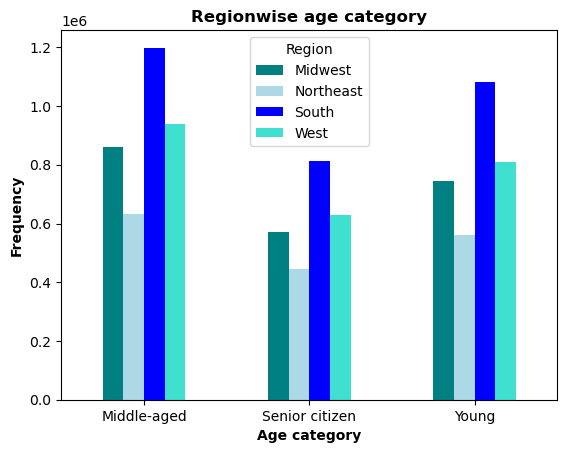

In [243]:
# Create bar chart for age_region

bar_age_region = age_region.plot(kind = 'bar', color = ('teal','lightblue','blue','turquoise'),rot = 0)
bar_age_region.legend(title = 'Region')
plt.title('Regionwise age category', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')
plt.xlabel ('Age category', fontweight = 'bold')

Text(0.5, 0, 'Income category')

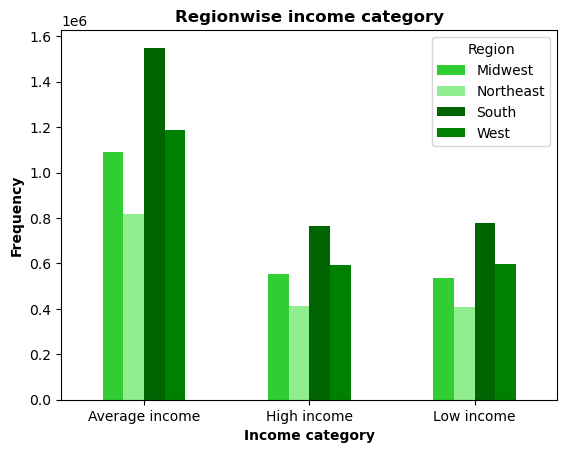

In [244]:
# Create bar chart for income_region

bar_income_region = income_region.plot(kind = 'bar', color = ('limegreen','lightgreen','darkgreen','green'),rot = 0)
bar_income_region.legend(title = 'Region', loc = 'upper right')
plt.title('Regionwise income category', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')
plt.xlabel ('Income category', fontweight = 'bold')

([<matplotlib.axis.YTick at 0x2793a8ae820>,
 [Text(0, 5, 'Young\ncouple'),
  Text(0, 4, 'Single adult'),
  Text(0, 3, 'Parents/sibilings\nwith dependants'),
  Text(0, 2, 'Married\nno dependants'),
  Text(0, 1, 'Married\nwith dependants'),
  Text(0, 0, 'Divorced/widowed\nno dependants')])

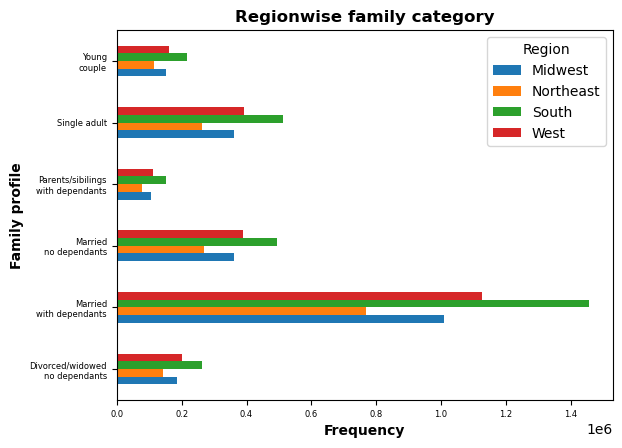

In [245]:
# Create bar chart for fam_region

bar_fam_region = fam_region.plot(kind = 'barh',rot = 0, fontsize = 6)
bar_fam_region.legend(title = 'Region', loc = 'upper right')
plt.title('Regionwise family category', fontweight = 'bold')
plt.xlabel ('Frequency', fontweight = 'bold')
plt.ylabel ('Family profile', fontweight = 'bold')
plt.yticks([5,4,3,2,1,0],['Young\ncouple','Single adult','Parents/sibilings\nwith dependants','Married\nno dependants','Married\nwith dependants','Divorced/widowed\nno dependants'])

Text(0.5, 0, 'Spending pattern')

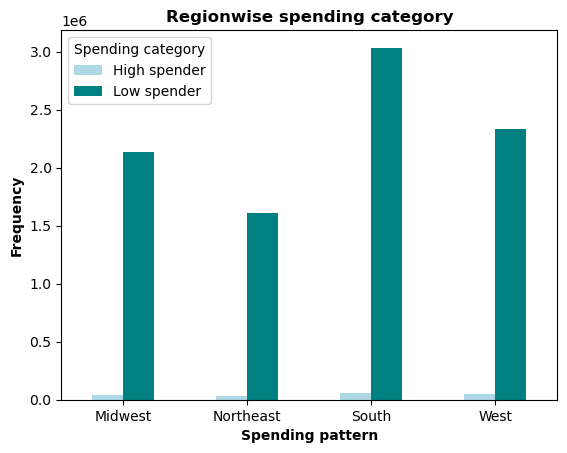

In [246]:
# Create bar chart for spending_region

bar_spending_region = spending_region.plot(kind = 'bar',color = ('lightblue','teal'),rot = 0)
bar_spending_region.legend(title = 'Spending category', loc = 'upper left')
plt.title('Regionwise spending category', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')
plt.xlabel ('Spending pattern', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

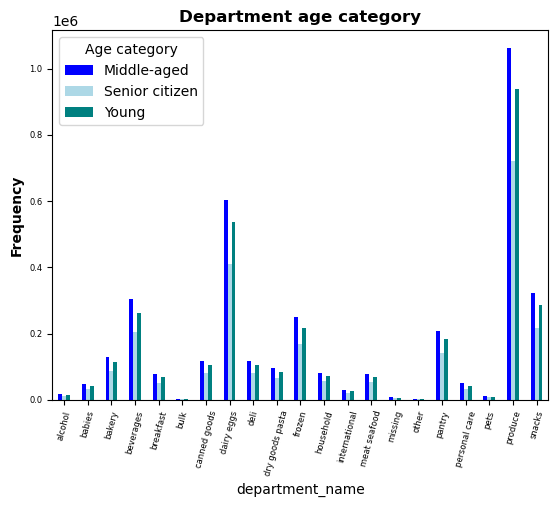

In [247]:
# Create bar chart for age_dept

bar_age_dept = age_dept.plot(kind = 'bar',color = ('Blue','lightblue','teal'),rot = 75, fontsize = 6)
bar_age_dept.legend(title = 'Age category', loc = 'upper left')
plt.title('Department age category', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

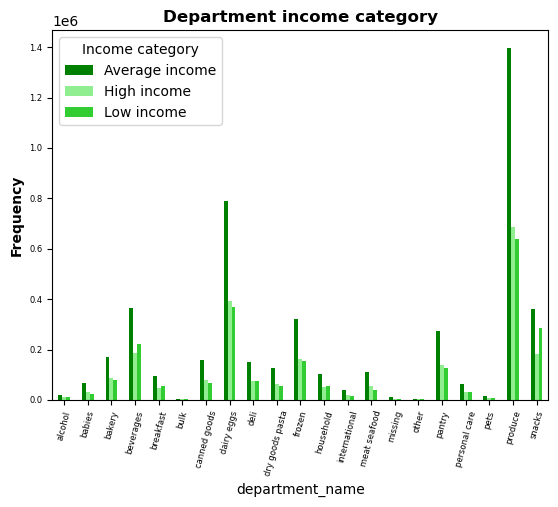

In [248]:
# Create bar chart for income_dept

bar_income_dept = income_dept.plot(kind = 'bar',color = ('green','lightgreen','limegreen'),rot = 75, fontsize = 6)
bar_income_dept.legend(title = 'Income category', loc = 'upper left')
plt.title('Department income category', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

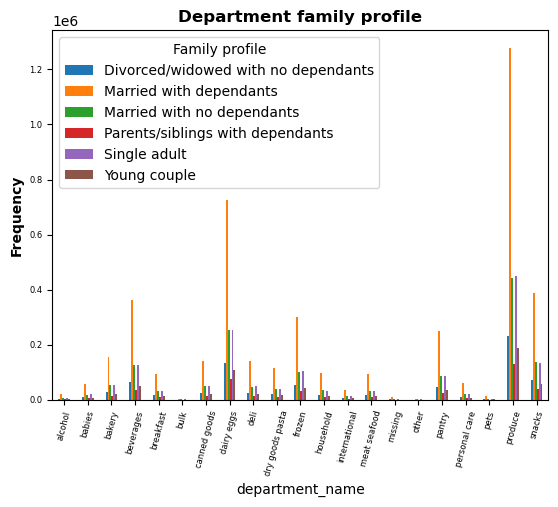

In [249]:
# Create bar chart for fam_dept

bar_fam_dept = fam_dept.plot(kind = 'bar',rot = 75, fontsize = 6)
bar_fam_dept.legend(title = 'Family profile', loc = 'upper left')
plt.title('Department family profile', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

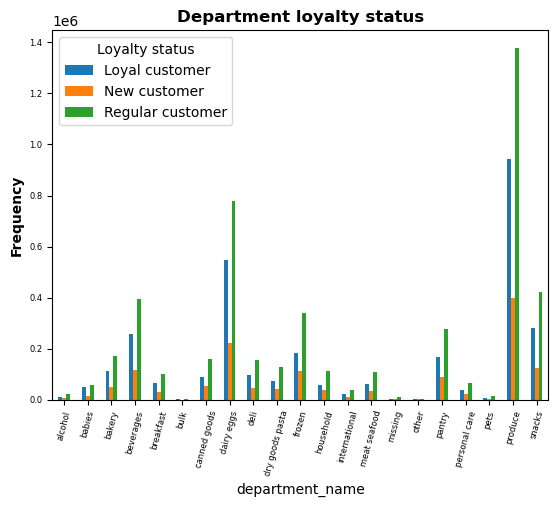

In [250]:
# Create bar chart for loyalty_dept

bar_loyalty_dept = loyalty_dept.plot(kind = 'bar',rot = 75, fontsize = 6)
bar_loyalty_dept.legend(title = 'Loyalty status', loc = 'upper left')
plt.title('Department loyalty status', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

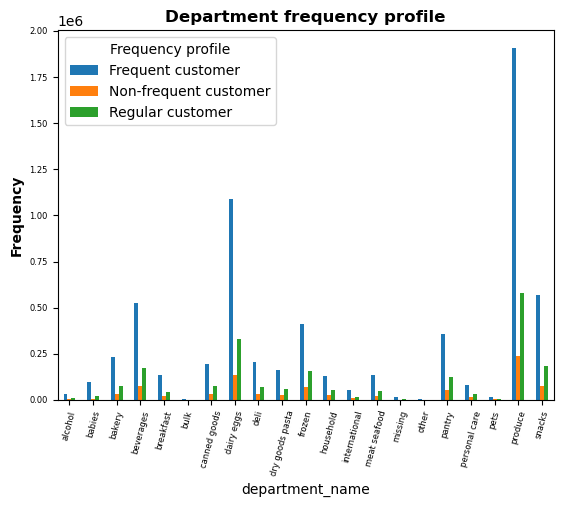

In [251]:
# Create bar chart for ordr_freq_dept

bar_freq_dept = ordr_freq_dept.plot(kind = 'bar',rot = 75, fontsize = 6)
bar_freq_dept.legend(title = 'Frequency profile', loc = 'upper left')
plt.title('Department frequency profile', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

([<matplotlib.axis.YTick at 0x2793b7404f0>,
 [Text(0, 5, 'Young\ncouple'),
  Text(0, 4, 'Single adult'),
  Text(0, 3, 'Parents/sibilings\nwith dependants'),
  Text(0, 2, 'Married\nno dependants'),
  Text(0, 1, 'Married\nwith dependants'),
  Text(0, 0, 'Divorced/widowed\nno dependants')])

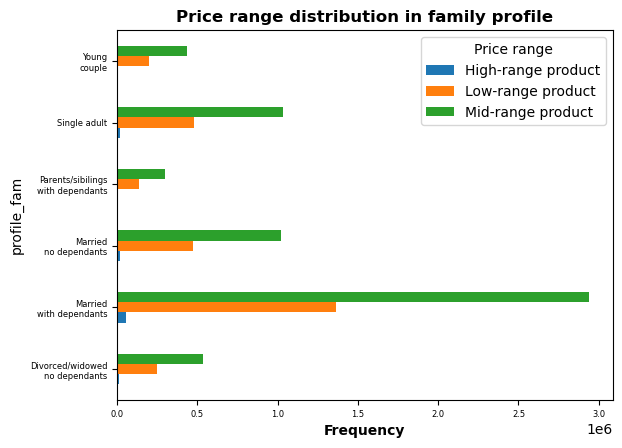

In [252]:
# Create bar chart for fam_price

bar_fam_price = fam_price.plot(kind = 'barh',rot = 0, fontsize = 6)
bar_fam_price.legend(title = 'Price range', loc = 'upper right')
plt.title('Price range distribution in family profile', fontweight = 'bold')
plt.xlabel ('Frequency', fontweight = 'bold')
plt.yticks([5,4,3,2,1,0],['Young\ncouple','Single adult','Parents/sibilings\nwith dependants','Married\nno dependants','Married\nwith dependants','Divorced/widowed\nno dependants'])

Text(0, 0.5, 'Frequency')

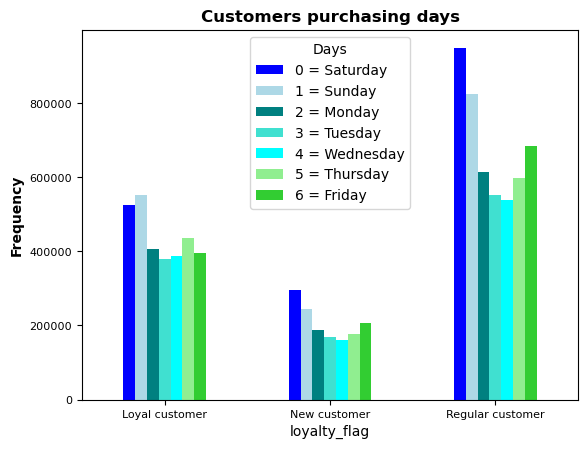

In [253]:
# Create bar chart for loyalty_dow

bar_loyalty_dow = loyalty_dow.plot(kind = 'bar', color = ('Blue','lightblue','teal','turquoise','cyan','lightgreen', 'limegreen'),rot = 0, fontsize = 8)
bar_loyalty_dow.legend(title = 'Days', labels =['0 = Saturday','1 = Sunday', '2 = Monday', '3 = Tuesday', '4 = Wednesday', '5 = Thursday', '6 = Friday'])
plt.title('Customers purchasing days', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0.5, 0, 'Frequency')

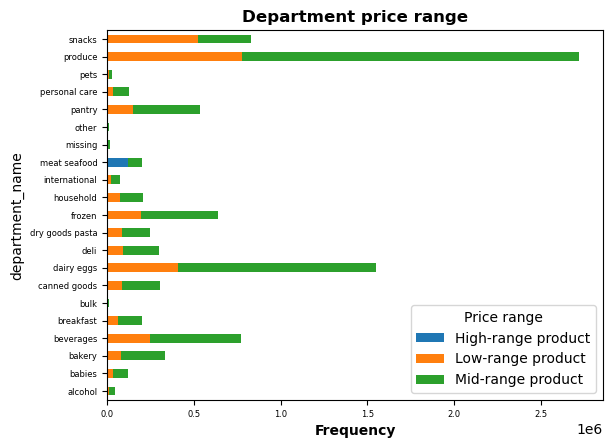

In [254]:
# Create bar chart for price_dept

bar_price_dept_2 = price_dept.plot(kind = 'barh',rot = 0, fontsize = 6, stacked = True)
bar_price_dept_2.legend(title = 'Price range', loc = 'lower right')
plt.title('Department price range', fontweight = 'bold')
plt.xlabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

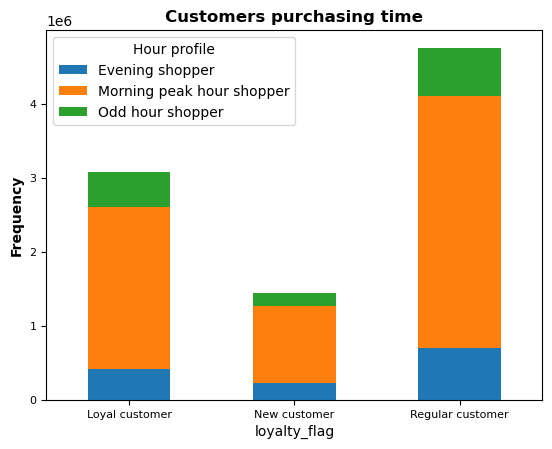

In [255]:
# Create bar chart for loyalty_hour

bar_loyalty_hour = loyalty_hour.plot(kind = 'bar', rot = 0, fontsize = 8, stacked = True)
bar_loyalty_hour.legend(title = 'Hour profile', loc = 'upper left')
plt.title('Customers purchasing time', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

Text(0, 0.5, 'Frequency')

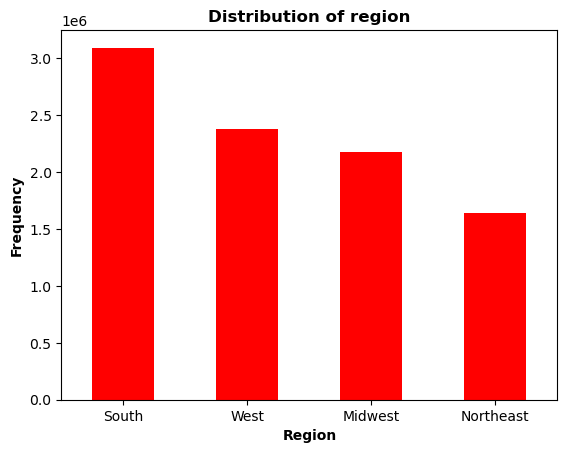

In [256]:
# Create bar chart for region

bar_region = df_high['region'].value_counts().plot.bar(color = 'red', rot = 0)
plt.title('Distribution of region', fontweight = 'bold')
plt.xlabel('Region', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

([<matplotlib.axis.YTick at 0x2793d0f20d0>,
 [Text(0, 0, 'Married'),
  Text(0, 1, 'Single'),
  Text(0, 2, 'Divorced/\nWidowed'),
  Text(0, 3, 'Living with parents\nsiblings')])

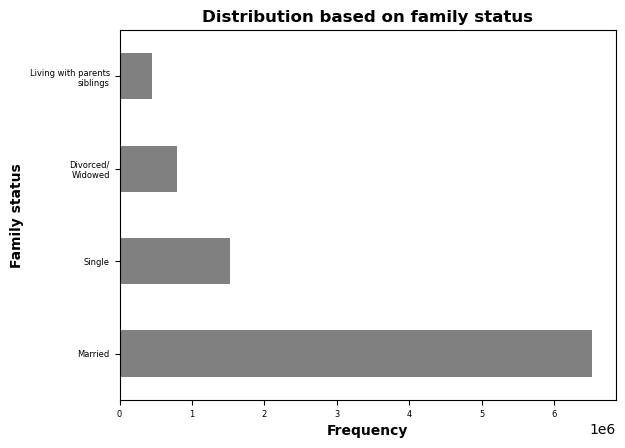

In [257]:
# Create bar chart for family status

bar_fam_status = df_high['family_status'].value_counts().plot.barh(color = 'grey', rot = 0, fontsize = 6)
plt.title('Distribution based on family status', fontweight = 'bold')
plt.ylabel('Family status', fontweight = 'bold')
plt.xlabel ('Frequency', fontweight = 'bold')
plt.yticks([0,1,2,3], ['Married', 'Single', 'Divorced/\nWidowed','Living with parents\nsiblings'])

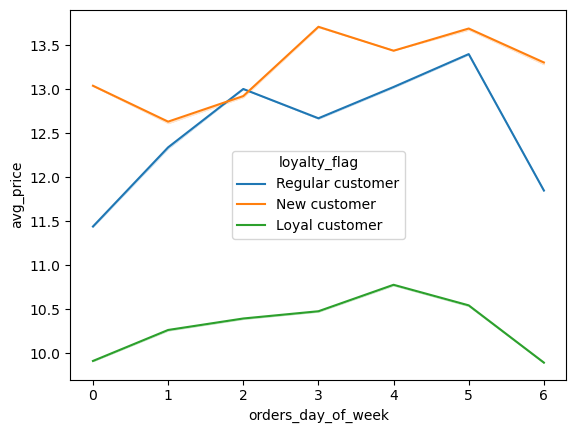

In [258]:
# Creating line chart on avg_price, loyalty flag and order day of week

line_dow_avg_price = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'loyalty_flag', data = df_high, ci = False)

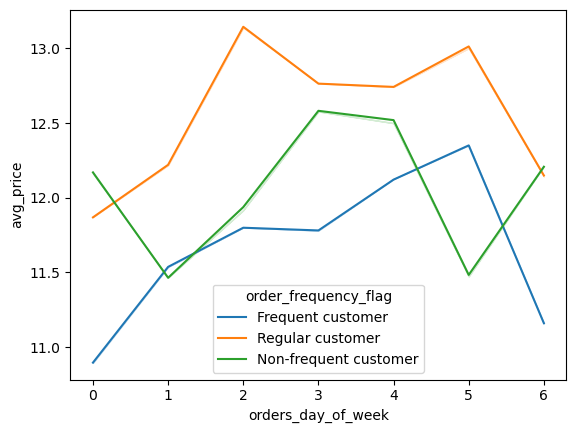

In [259]:
# Creating line chart on avg_price, order_freq_flag and order day of week

line_dow_avg_price_freq = sns.lineplot(x = 'orders_day_of_week', y = 'avg_price', hue = 'order_frequency_flag', data = df_high, ci = False)

In [260]:
#Creating crosstab for age and day of week

age_dow = pd.crosstab(df_high['age_flag'], df_high['orders_day_of_week'], dropna = False)

Text(0, 0.5, 'Frequency')

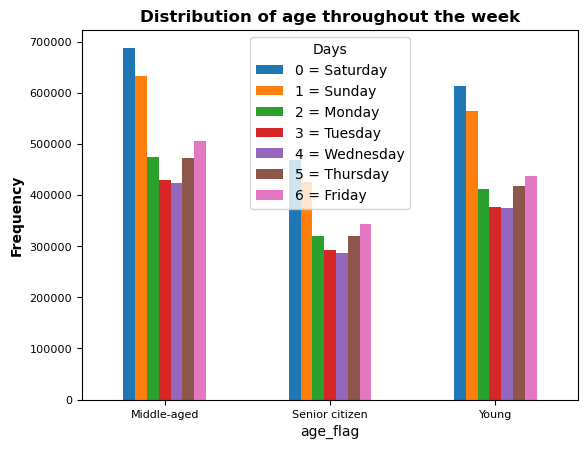

In [261]:
# Create bar chart for loyalty_hour

bar_age_dow = age_dow.plot(kind = 'bar', rot = 0, fontsize = 8)
bar_age_dow.legend(title = 'Days', labels =['0 = Saturday','1 = Sunday', '2 = Monday', '3 = Tuesday', '4 = Wednesday', '5 = Thursday', '6 = Friday'])
plt.title('Distribution of age throughout the week', fontweight = 'bold')
plt.ylabel ('Frequency', fontweight = 'bold')

## 10. Export the dataset and visualizations

In [262]:
# Export the df_high_cust 

df_high_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_customer.pkl'))

In [263]:
# Export the small sample df_high

df_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Small_sample_high_activity_customer.pkl'))

In [264]:
#Export the visualization - 1

bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_profile.png'))

In [265]:
#Export the visualization - 2

bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_profile.png'))

In [266]:
#Export the visualization - 3

bar_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_profile.png'))

In [267]:
#Export the visualization - 4

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_range_distribution.png'))

In [268]:
#Export the visualization - 5

bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'DOW_distribution.png'))

In [269]:
#Export the visualization - 6

hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Time_hist.png'))

In [270]:
#Export the visualization - 7

bar_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending_profile.png'))

In [271]:
#Export the visualization - 8

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Cust_loyalty_distribution.png'))

In [272]:
#Export the visualization - 9

bar_order_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Order_freq_distribution.png'))

In [273]:
#Export the visualization - 10

pie_alcohol.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Alcohol.png'))

In [274]:
#Export the visualization - 11

pie_pets.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pets.png'))

In [275]:
#Export the visualization - 12

pie_meat_eaters.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Meat_eaters.png'))

In [276]:
#Export the visualization - 13

pie_babies.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Babies.png'))

In [277]:
#Export the visualization - 14

bar_dept_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept_Frequency.png'))

In [278]:
#Export the visualization - 15

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_region.png'))

In [279]:
#Export the visualization - 16

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_region.png'))

In [280]:
#Export the visualization - 17

bar_fam_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_region.png'))

In [281]:
#Export the visualization - 18

bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending_region.png'))

In [282]:
#Export the visualization - 19

bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_dept.png'))

In [283]:
#Export the visualization - 20

bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_dept.png'))

In [284]:
#Export the visualization - 21

bar_fam_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_dept.png'))

In [285]:
#Export the visualization - 22

bar_loyalty_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty_dept.png'))

In [286]:
#Export the visualization - 23

bar_freq_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Freq_dept.png'))

In [287]:
#Export the visualization - 24

bar_fam_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Fam_price.png'))

In [288]:
#Export the visualization - 25

bar_loyalty_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty_dow.png'))

In [289]:
#Export the visualization - 26

bar_price_dept_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_dept.png'))

In [290]:
#Export the visualization - 27

bar_loyalty_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty_hour.png'))

In [291]:
#Export the visualization - 28

bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Region.png'))

In [292]:
#Export the visualization - 29

bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_status.png'))

In [293]:
#Export the visualization - 30

line_dow_avg_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_week_loyalty.png'))

In [294]:
#Export the visualization - 31

line_dow_avg_price_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_week_freq.png'))

In [295]:
#Export the visualization - 32

bar_age_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_week.png'))

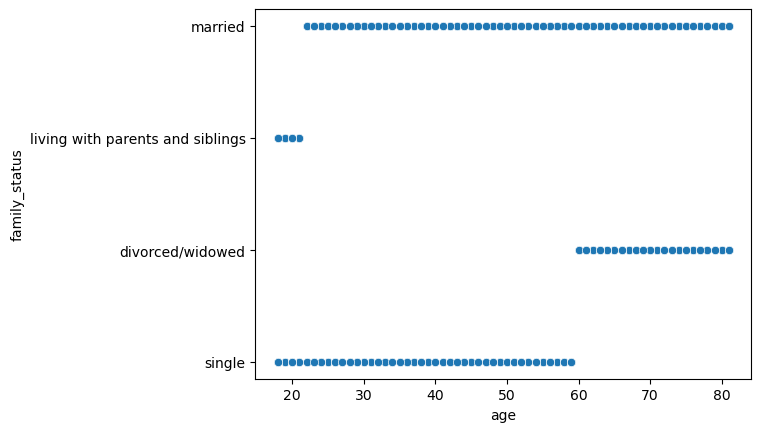

In [296]:
scatter_age_family = sns.scatterplot(x = 'age', y = 'family_status', data = df_high)

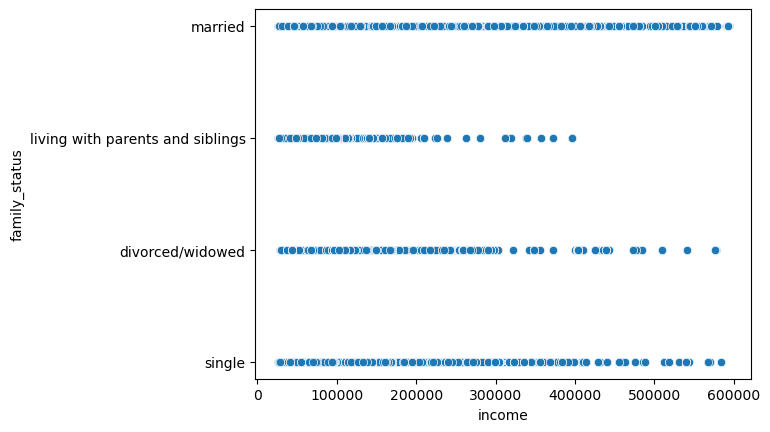

In [297]:
scatter_income_family = sns.scatterplot(x = 'income', y = 'family_status', data = df_high)

In [298]:
#Export the visualization - 33

scatter_age_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_family_status.png'))

In [299]:
#Export the visualization - 34

scatter_income_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_family_status.png'))